# Datos

- CUST_ID (Identificación del Cliente): Este es un identificador único para cada cliente y se utiliza para distinguir a los clientes entre sí. No aporta información para el análisis de clústeres y generalmente se elimina.

- BALANCE (Saldo): Indica el saldo actual en la cuenta del cliente, es decir, cuánto dinero tiene el cliente en su cuenta en un momento dado.

- BALANCE_FREQUENCY (Frecuencia de Actualización del Saldo): Muestra con qué frecuencia el cliente actualiza su saldo, lo que podría indicar la actividad de la cuenta.

- PURCHASES (Compras): Representa el total de compras realizadas por el cliente en su tarjeta de crédito.

- NEOFF_PURCHASES (Compras de una sola vez): Indica el monto total de las compras que el cliente realizó en una sola transacción, en lugar de compras a plazos.

- INSTALLMENTS_PURCHASES (Compras a Plazos): Muestra el total de compras que el cliente realizó a través de pagos a plazos o financiados.

- CASH_ADVANCE (Avance en Efectivo): Indica la cantidad de dinero que el cliente ha retirado en efectivo utilizando su tarjeta de crédito.

- PURCHASES_FREQUENCY (Frecuencia de Compras): Muestra con qué frecuencia el cliente realiza compras en su tarjeta de crédito.

- ONEOFF_PURCHASES_FREQUENCY (Frecuencia de Compras de una sola vez): Indica con qué frecuencia el cliente realiza compras en una sola transacción.

- PURCHASES_INSTALLMENTS_FREQUENCY (Frecuencia de Compras a Plazos): Muestra con qué frecuencia el cliente realiza compras a través de pagos a plazos.

- CASH_ADVANCE_FREQUENCY (Frecuencia de Avance en Efectivo): Indica la frecuencia con la que el cliente realiza avances en efectivo.

- CASH_ADVANCE_TRX (Número de Transacciones de Avance en Efectivo): Representa el número total de transacciones de avance en efectivo realizadas por el cliente.

- PURCHASES_TRX (Número de Transacciones de Compras): Muestra el número total de transacciones de compras realizadas por el cliente.

- CREDIT_LIMIT (Límite de Crédito): Indica el límite máximo de crédito otorgado al cliente por parte de la institución financiera.

- PAYMENTS (Pagos): Representa el total de pagos realizados por el cliente en su tarjeta de crédito.

- MINIMUM_PAYMENTS (Pagos Mínimos): Indica el monto mínimo que el cliente debe pagar en su tarjeta de crédito en un período determinado.

- PRC_FULL_PAYMENT (Porcentaje de Pago Completo): Muestra el porcentaje del saldo total que el cliente paga en su totalidad en lugar de realizar pagos mínimos.

- TENURE (Duración): Indica la duración o antigüedad de la cuenta del cliente con la institución financiera en meses.







In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px


In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
ruta_al_csv = '/content/drive/My Drive/TUIA/Mineria de Datos/CC GENERAL.csv'
data = pd.read_csv(ruta_al_csv)

In [129]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [130]:
data = data.drop(['CUST_ID'], axis=1) #Elimino la columna identificatoria del data set ya que no vamos a trabajar con la misma

In [131]:

data.shape

(8950, 17)

In [132]:
data.info() # Chequeamos que datos tenemos y si hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Reemplazamos los nulos por la media de los datos

In [133]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

Volvemos a chequear que todos los campos sean no nulos

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Estandarizamos los datos.
Podemos hacerlo de dos formas:

- Utilizamos la libreria StandardScaler
- Manualmente calculando la media y el desvio estandar de cada columna y luego aplicamos estandarizacion

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Creo el objeto scaler
X_scaled = scaler.fit_transform(data) # Calcula la media y la desviación estándar de los datos y luego aplica la transformación de estandarización.

In [136]:
data_estandarizada = pd.DataFrame(X_scaled, columns=data.columns) # Solo para verlo como un data frame y no como array
data_estandarizada

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In [137]:
media = data.mean()
desviacion_estandar = data.std()

data_estandarizada = (data - media) / desviacion_estandar

In [138]:
data_estandarizada

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,4.878032e-17,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960380,-0.486189,-3.498345e-01,1.183885,-4.122537
8946,-0.742382,0.518055,-0.329118,-0.356914,-0.122817,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960380,-0.503368,4.878032e-17,-0.525522,-4.122537
8947,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,-0.476043,-0.390617,-0.960380,-0.570583,-3.354467e-01,0.329182,-4.122537
8948,-0.745133,-0.185466,-0.469526,-0.356914,-0.454551,-0.449327,-1.221690,-0.678623,-0.916944,0.157518,-0.182988,-0.591763,-1.097795,-0.580503,-3.468871e-01,0.329182,-4.122537


# K means

## Calculo del diagrama de codo

El objetivo es identificar un punto en el gráfico donde la disminución en la suma de las distancias intraclúster (también conocida como inercia) comienza a disminuir de manera significativamente más lenta. Este punto se denomina "codo" y sugiere el número óptimo de clústeres para el conjunto de datos.


La inercia en K-means se calcula sumando las distancias cuadradas entre cada punto de datos y el centroide de su grupo asignado, y luego sumando estas distancias para todos los puntos en el conjunto de datos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

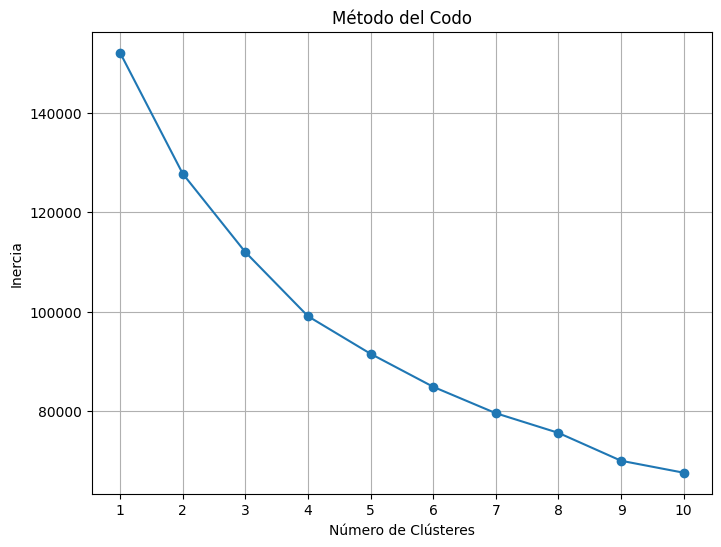

In [139]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

## Creamos el modelo

In [140]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
data['Cluster KMeans'] = kmeans.labels_
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KMeans
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


## Interpretaciones

In [141]:
data.groupby('Cluster KMeans').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster KMeans,,,,,,,,,,,,,,,,,
0,642.363600,0.902209,792.814641,166.302961,627.006611,177.774517,0.856289,0.083368,0.793706,0.037991,0.708005,16.609291,3196.518587,931.253880,674.676621,0.272287,11.454168
1,1903.802464,0.979152,2926.566004,1985.128805,941.869165,360.517638,0.924202,0.732140,0.587144,0.058643,1.173506,43.595392,6978.399764,2789.452534,845.264123,0.264692,11.884089
2,4606.453997,0.967938,484.886707,297.999610,186.975199,4612.769925,0.279210,0.129795,0.181180,0.490992,14.642114,7.292894,7532.672916,3580.932423,2021.224045,0.035827,11.380416
3,4516.369799,0.976364,15897.090235,10780.888000,5116.202235,1039.836264,0.927255,0.765205,0.778930,0.084314,2.858824,130.435294,12451.764706,15563.997149,3344.425716,0.398384,11.964706
4,1050.675045,0.796808,279.057799,225.964482,53.295740,618.767712,0.163483,0.096965,0.065778,0.118312,2.198926,2.953465,3342.985029,1006.519823,592.473183,0.070672,11.456661


In [142]:
kmeans.cluster_centers_
# caracteristicas normalizadas que tendria el centroide de ese cluster.

array([[-0.44289869,  0.10573919, -0.09838795, -0.25669758,  0.23892065,
        -0.38197663,  0.9121408 , -0.39908701,  1.08051721, -0.48542131,
        -0.37227861,  0.07657812, -0.35665089, -0.27691018, -0.0812247 ,
         0.40539931, -0.04735755],
       [ 0.16302734,  0.43007491,  0.90023276,  0.83907427,  0.58698308,
        -0.29486872,  1.08098427,  1.7755532 ,  0.56037255, -0.38229751,
        -0.30410902,  1.16210401,  0.68270231,  0.36488582, -0.0081282 ,
         0.37943032,  0.27406628],
       [ 1.45953135,  0.38160192, -0.24263721, -0.17724743, -0.24816876,
         1.73160183, -0.52608803, -0.24272197, -0.46190068,  1.77756445,
         1.6682222 , -0.29858756,  0.83324303,  0.63637398,  0.49563035,
        -0.40326942, -0.1073158 ],
       [ 1.41821508,  0.41830639,  6.97111067,  6.13837823,  5.20313961,
         0.02907191,  1.08859143,  1.88639205,  1.04294531, -0.25401244,
        -0.05714949,  4.65578731,  2.18703147,  4.77765852,  1.06426263,
         0.83652629

In [143]:
observaciones_por_cluster = data['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

0    2411
1    1389
2    1154
3      85
4    3911
Name: Cluster KMeans, dtype: int64

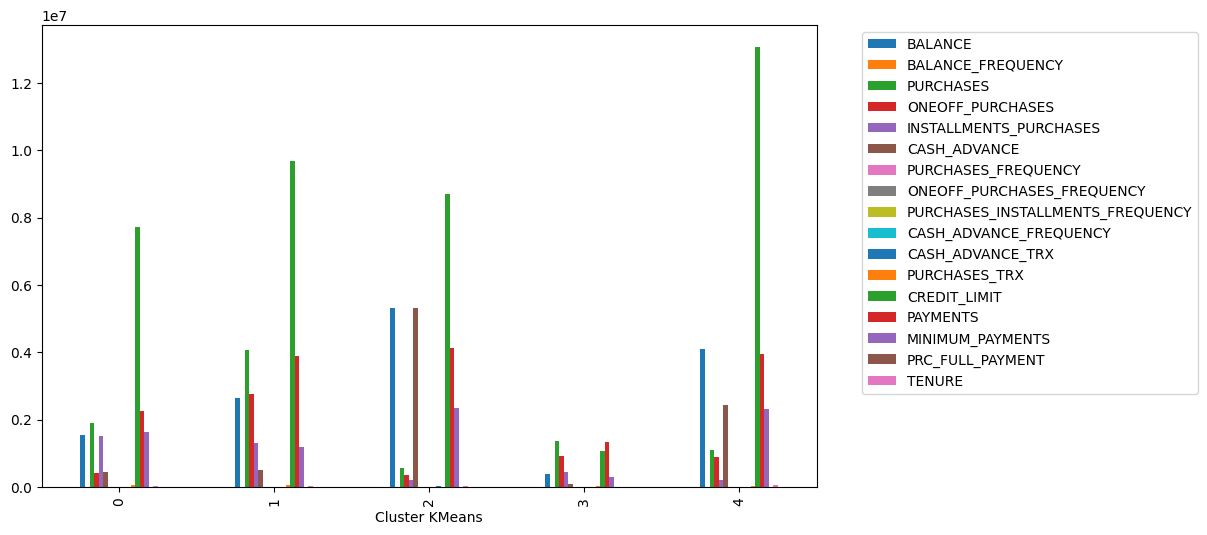

In [144]:
data.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


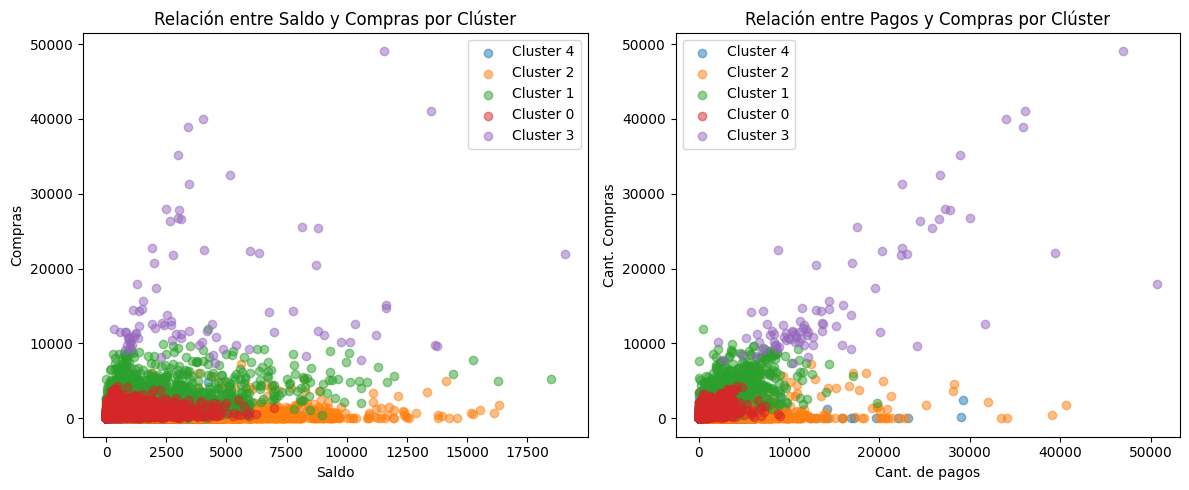

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.sca(ax[0])
for cluster_label in data['Cluster KMeans'].unique():
    cluster_data = data[data['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['BALANCE'], cluster_data['PURCHASES'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Saldo')
plt.ylabel('Compras')
plt.title('Relación entre Saldo y Compras por Clúster')
plt.legend()

plt.sca(ax[1])
for cluster_label in data['Cluster KMeans'].unique():
    cluster_data = data[data['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['PAYMENTS'], cluster_data['PURCHASES'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Cant. de pagos')
plt.ylabel('Cant. Compras')
plt.title('Relación entre Pagos y Compras por Clúster')
plt.legend()

plt.tight_layout()

plt.show()


### PCA

Con PCA podemos analizar que tan bien quedaron diferenciados los clusters, ya que si se armaron grupos definidos deberiamos poder visualizar con el ojo humano grupos separados, entonces confirmamos que el KMeans categorizo bien y no quedaron grupos superpuestos

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(X_scaled)


In [147]:
componentes_principales

array([[-1.68222018, -1.07645395],
       [-1.13829002,  2.50645115],
       [ 0.96968204, -0.3835164 ],
       ...,
       [-0.92620505, -1.81078018],
       [-2.33655126, -0.65796223],
       [-0.55642036, -0.40046431]])

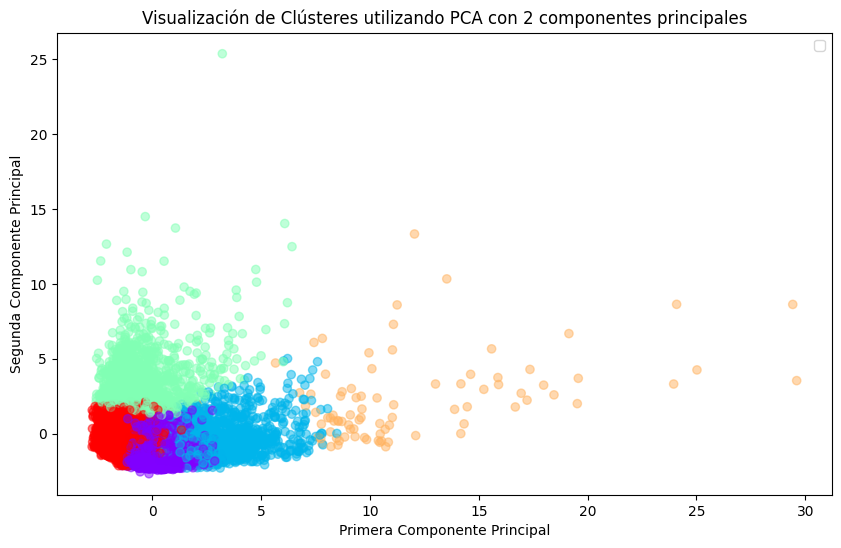

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=data['Cluster KMeans'] ,cmap='rainbow', alpha=0.5)
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Visualización de Clústeres utilizando PCA con 2 componentes principales')
plt.legend()
plt.show()

# Clustering Jerarquico

In [149]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [151]:
Z = linkage(X_scaled, "ward")

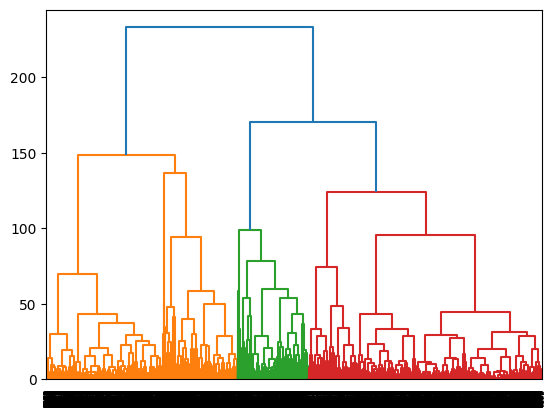

In [152]:
dendrogram(Z)
plt.show()

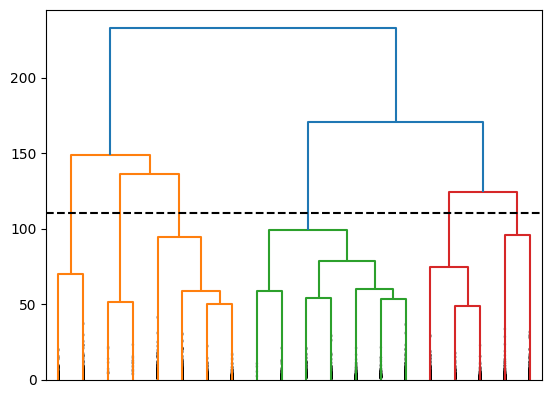

In [153]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = False, show_contracted = True)
plt.axhline(y=110, c='k', linestyle='dashed')
plt.show()

In [154]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 30):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(X_scaled)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(X_scaled, X_scaled, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()

    distancias.append(distancia_total)


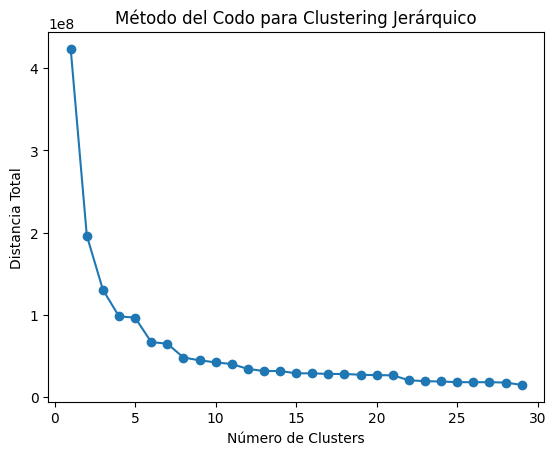

In [155]:
plt.plot(range(1, 30), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()


In [156]:
n_clusters = 6
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(X_scaled)

data['Cluster'] = cluster_assignments

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KMeans,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4,2


In [157]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(X_scaled, cluster_assignments)
silhouette_avg

0.22753964588603232

 # DBSCAN y HDBSCAN



In [158]:
!pip install hdbscan


Parametros
DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

- eps (Epsilon): Este parámetro controla la distancia máxima entre dos muestras para que una sea considerada parte del mismo clúster. En otras palabras, establece la distancia máxima entre puntos vecinos que se agruparán juntos. Un valor pequeño de eps puede hacer que el algoritmo encuentre más clústeres, mientras que un valor grande puede fusionar más puntos en un solo clúster.

- min_samples: Este parámetro define el número mínimo de muestras (puntos de datos) en un vecindario para que un punto sea considerado núcleo (core point). Los puntos núcleo son aquellos que tienen al menos min_samples puntos dentro de una distancia de eps. Los puntos que no son núcleo, pero están dentro del vecindario de un punto núcleo, se consideran puntos límite o de borde.

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise):

- min_cluster_size: Este parámetro establece el tamaño mínimo del clúster. Los clústeres con menos puntos que min_cluster_size no se considerarán como clústeres válidos y se etiquetarán como ruido (-1 en las etiquetas). Aumentar este valor tiende a producir menos clústeres.


In [159]:
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN

dbscan = DBSCAN(eps=1, min_samples=100)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Elimino duplicados para ver cuantos grupos tengo y veo la cantidad que tengo
groups = len(set(dbscan_labels))
#Evaluo cual de ellos es ruido (si es -1)
count_noise = (1 if -1 in dbscan_labels else 0)

print("Número de clústeres identificados por DBSCAN:", groups - count_noise)


Número de clústeres identificados por DBSCAN: 3


In [160]:
hdbscan = HDBSCAN(min_cluster_size=100)
hdbscan_labels = hdbscan.fit_predict(X_scaled)
print("Número de clústeres identificados por HDBSCAN:", len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0))

Número de clústeres identificados por HDBSCAN: 2


In [161]:
data['Cluster DBSCAN'] = dbscan_labels
data['Cluster HDBSCAN'] = hdbscan_labels

In [162]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KMeans,Cluster,Cluster DBSCAN,Cluster HDBSCAN
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,4,2,0,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0,-1,-1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,1,1,-1,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,864.206542,0.000000,12,4,2,-1,-1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,325.594462,48.886365,0.500000,6,0,5,-1,-1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,1000.0,275.861322,864.206542,0.000000,6,0,5,-1,-1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5,1000.0,81.270775,82.418369,0.250000,6,0,5,-1,-1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0,500.0,52.549959,55.755628,0.250000,6,4,5,-1,-1


# Metricas para validar el modelo

**Metodo del codo:** Calcula la suma de cuadrados de las distancias dentro de cada cluster (inercia) para cada número de clusters. La idea es encontrar el punto en el gráfico donde la disminución de la inercia comienza a desacelerarse, formando un "codo".

**Gap Statistic:** Compara la log-verosimilitud (medida que proporciona información sobre cuán bien un modelo probabilístico se ajusta a los datos observados,) de los datos con clusters y la log-verosimilitud de los datos completamente aleatorios.
Cuanto mayor sea la diferencia entre estas log-verosimilitudes, mayor será la probabilidad de que los datos se agrupen en clusters reales en lugar de ser aleatorios.
- Un Gap Statistic más grande indica que el número correspondiente de clusters es más apropiado.

El **Coeficiente de Silhouette**: métrica que evalúa la cohesión y separación de los clusters. Para cada punto de datos, se calcula la silueta, que es la diferencia entre la distancia media al resto de puntos en su cluster y la distancia media al punto más cercano en otro cluster, dividida por el máximo de estas dos distancias.
- Varía entre -1 y 1.
- Un valor alto indica que el punto está bien enlazado a su propio cluster y está separado de otros clusters.
- Un valor bajo indica que el punto está cerca del límite entre dos clusters. Si es negativo, podría haber sido asignado al cluster incorrecto.

## K Means

### Metodo del codo

In [163]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

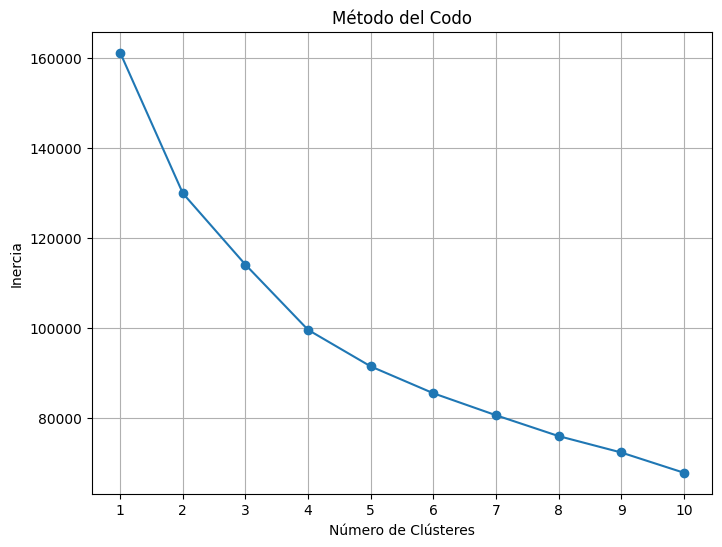

In [164]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

### Gap Statistic

In [165]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

In [ ]:
gaps = []
max_k = 10
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k)
    #Calculo al inercia de datos aleatorios con la mismsa estrucutra que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*X_scaled.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)


optimal_k = np.argmax(gaps) + 1


Número óptimo de clusters según el Gap Statistic: 10


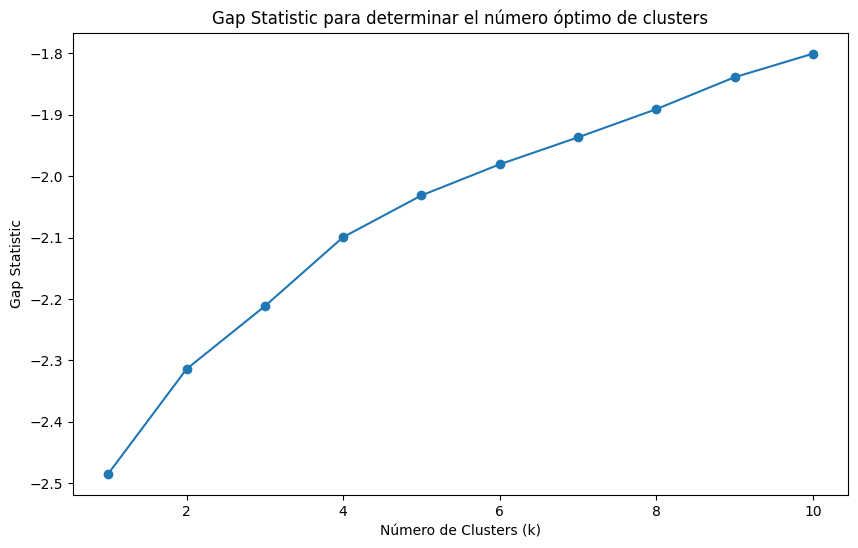

In [167]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

### Coeficiente de Silhoutte

In [ ]:
def calculate_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 10

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(X_scaled, k)
    silhouette_scores.append(silhouette_avg)

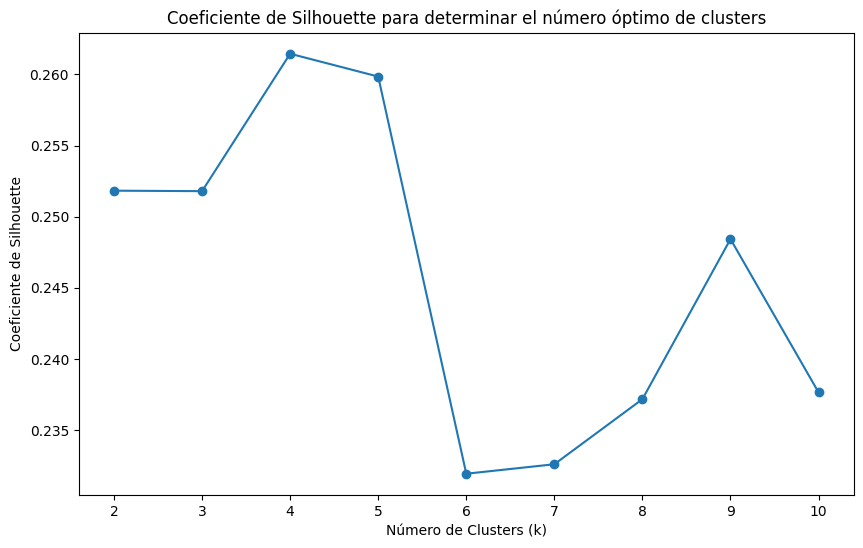

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters')
plt.show()

##Jerarquico

### Metodo del codo

In [170]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 30):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(X_scaled)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(X_scaled, X_scaled, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()

    distancias.append(distancia_total)

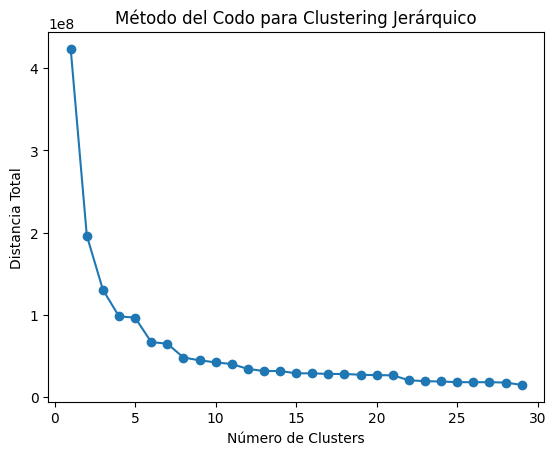

In [171]:
plt.plot(range(1, 30), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

### Gap Statistic

In [177]:
def calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    centroids = np.array([np.mean(X_scaled[labels == i], axis=0) for i in range(k)])
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_scaled[labels] - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion


In [178]:
gaps = []
max_k = 15
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward')

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*X_scaled.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 1


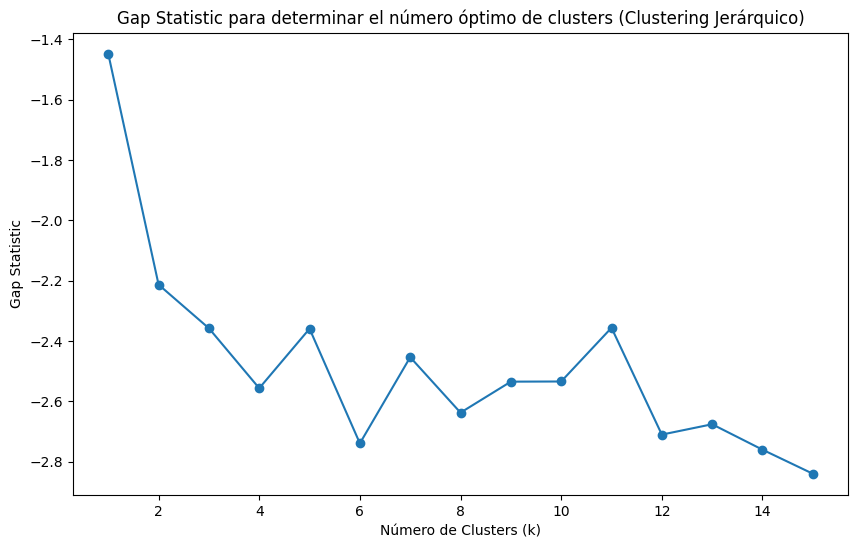

In [174]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()

### Coeficiente de Silhuette

In [175]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 15

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(X_scaled, k)
    silhouette_scores.append(silhouette_avg)

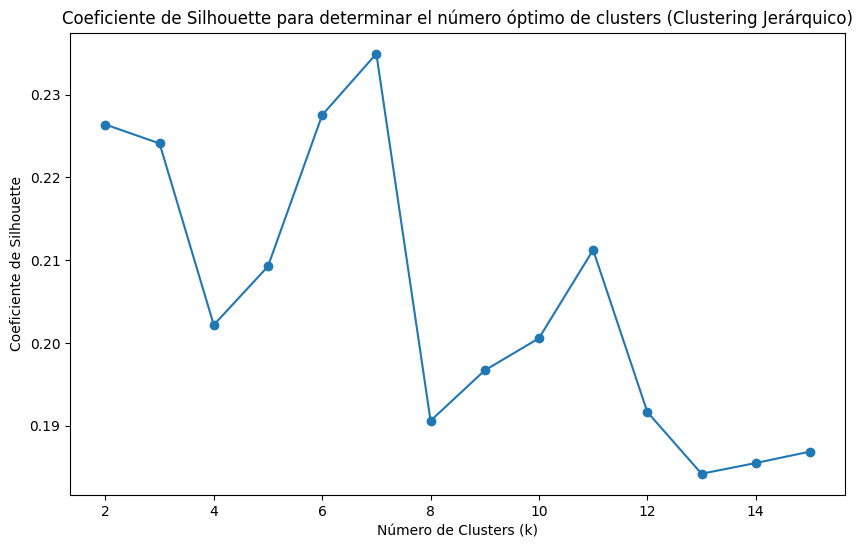

In [176]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()